EDA for real data

In [2]:
import dask.dataframe as dd
import pandas as pd
# read parquet file
# df = dd.read_parquet("hf://datasets/Weijie1996/load_timeseries/30m_resolution_ge/ge_30m.parquet")
df = dd.read_parquet("ge_30m.parquet")
# df = dd.read_parquet("hf://datasets/OpenSynth/TUDelft-Electricity-Consumption-1.0/**/*.parquet")

# change to pandas dataframe
df = df.compute()


In [3]:

df.info()
df.describe()

df["datetime"] = pd.to_datetime(df["datetime"])

df["hour"] = df["datetime"].dt.hour
df["dayofweek"] = df["datetime"].dt.dayofweek
df["month"] = df["datetime"].dt.month

# Display the first few rows
display(df.head())

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Show unique values for categorical columns
print("\nUnique ids:", df["id"].nunique())
print("Unique categories:", df["category"].unique())

# Show basic statistics for numerical columns
print("\nNumerical columns statistics:")
print(df.describe())

# Show statistics for datetime features
print("\nDatetime range:", df["datetime"].min(), "to", df["datetime"].max())
print("Number of days covered:", (df["datetime"].max() - df["datetime"].min()).days)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232538 entries, 0 to 232537
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  232538 non-null  datetime64[ns]
 1   id        232538 non-null  string        
 2   target    232538 non-null  float64       
 3   category  232538 non-null  string        
dtypes: datetime64[ns](1), float64(1), string(2)
memory usage: 8.6 MB


,datetime,id,target,category,hour,dayofweek,month
0,2015-05-21 15:30:00,GE_1,0.157,30m,15,3,5
1,2015-05-21 16:00:00,GE_1,0.584,30m,16,3,5
2,2015-05-21 16:30:00,GE_1,0.545,30m,16,3,5
3,2015-05-21 17:00:00,GE_1,0.677,30m,17,3,5
4,2015-05-21 17:30:00,GE_1,0.351,30m,17,3,5


Missing values per column:
datetime     0
id           0
target       0
category     0
hour         0
dayofweek    0
month        0
dtype: int64

Unique ids: 6
Unique categories: <ArrowStringArray>
['30m']
Length: 1, dtype: string

Numerical columns statistics:
                            datetime         target           hour  \
count                         232538  232538.000000  232538.000000   
mean   2016-12-03 21:24:05.183153408       0.492859      11.501819   
min              2015-04-15 09:00:00       0.000000       0.000000   
25%              2016-04-04 14:37:30       0.093000       6.000000   
50%              2016-10-23 11:15:00       0.201000      12.000000   
75%              2017-06-22 20:00:00       0.482000      18.000000   
max              2019-05-01 22:00:00     803.940000      23.000000   
std                              NaN       1.856273       6.922164   

           dayofweek          month  
count  232538.000000  232538.000000  
mean        3.001114       6.54

In [4]:
import numpy
import matplotlib
# import pandas

print("numpy", numpy.__version__)
# print("matplotlib", matplotlib.__version__)
# print("pandas", pandas.__version__)

import numpy
print(numpy.__version__)
print(numpy.__file__)
import sys
print(sys.executable)



numpy 1.26.4
1.26.4
/home/yang/anaconda3/envs/fcp_env/lib/python3.10/site-packages/numpy/__init__.py
/home/yang/anaconda3/envs/fcp_env/bin/python


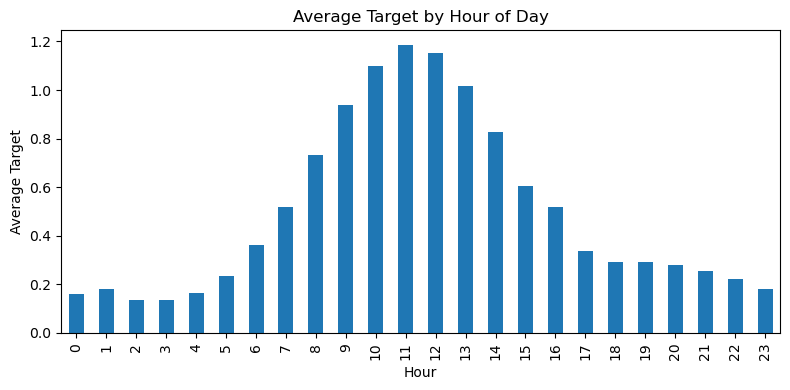

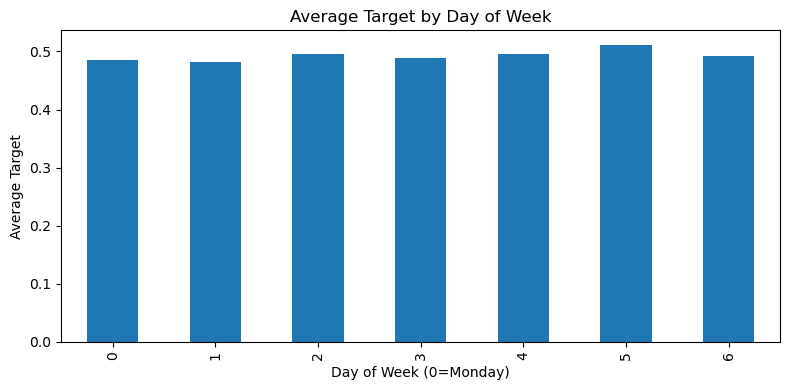

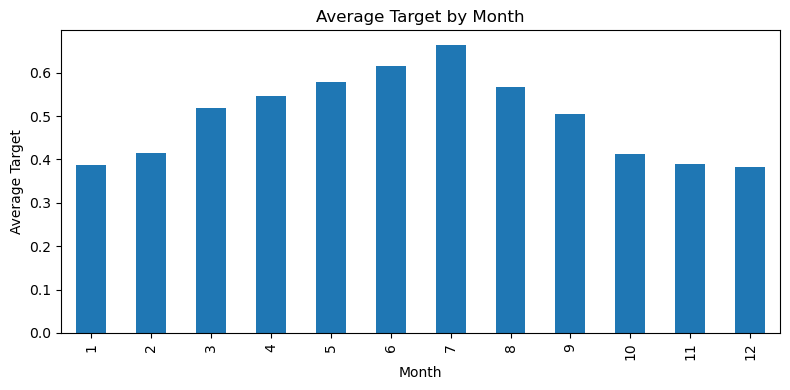

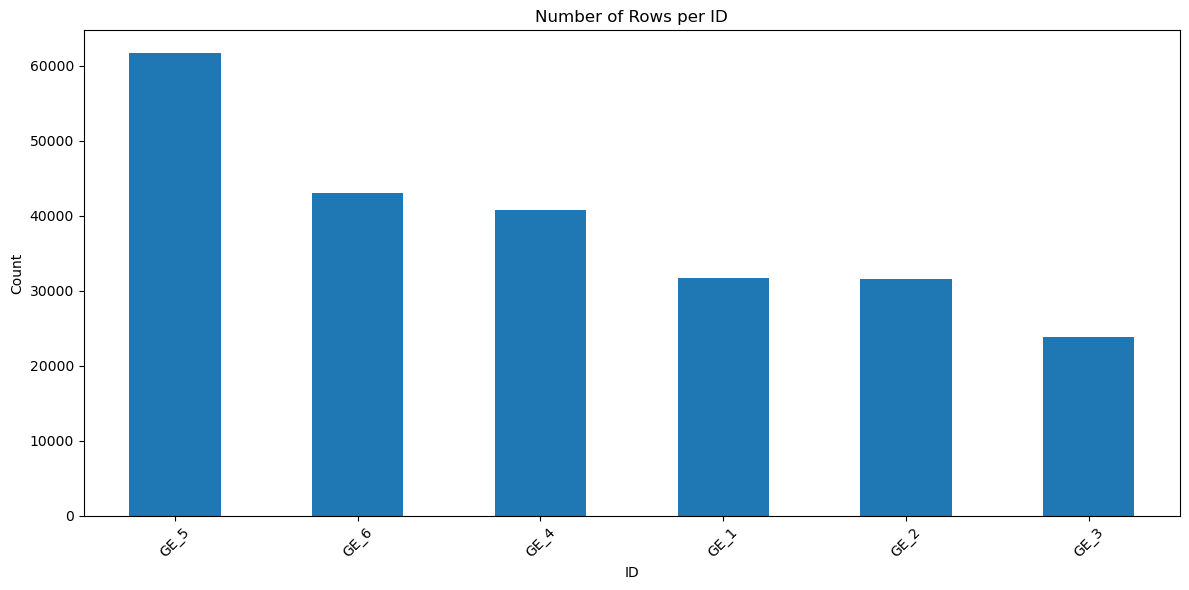

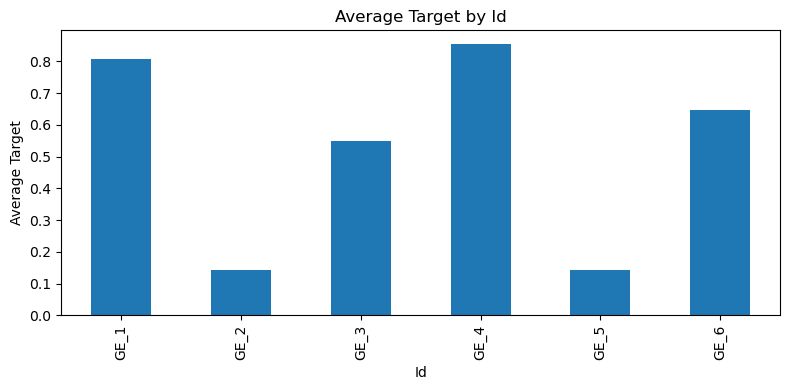

In [10]:
import matplotlib.pyplot as plt

# Create time-based columns
df["hour"] = df["datetime"].dt.hour
df["dayofweek"] = df["datetime"].dt.dayofweek
df["month"] = df["datetime"].dt.month

# Plot 1: Average target by hour of day
plt.figure(figsize=(8, 4))
df.groupby("hour")["target"].mean().plot(kind="bar")
plt.title("Average Target by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average Target")
plt.tight_layout()
plt.show()

# Plot 2: Average target by day of week
plt.figure(figsize=(8, 4))
df.groupby("dayofweek")["target"].mean().plot(kind="bar")
plt.title("Average Target by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Average Target")
plt.tight_layout()
plt.show()

# Plot 3: Average target by month
plt.figure(figsize=(8, 4))
df.groupby("month")["target"].mean().plot(kind="bar")
plt.title("Average Target by Month")
plt.xlabel("Month")
plt.ylabel("Average Target")
plt.tight_layout()
plt.show()


id_counts = df["id"].value_counts()

plt.figure(figsize=(12, 6))
id_counts.plot(kind='bar')
plt.title("Number of Rows per ID")
plt.xlabel("ID")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
df.groupby("id")["target"].mean().plot(kind="bar")
plt.title("Average Target by Id")
plt.xlabel("Id")
plt.ylabel("Average Target")
plt.tight_layout()
plt.show()


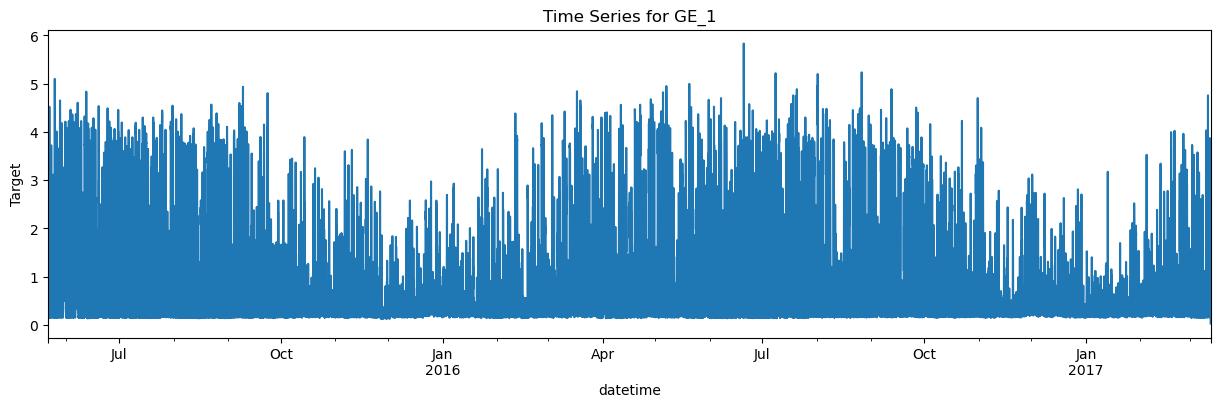

id
GE_1    0.807024
GE_2    0.142279
GE_3    0.548320
GE_4    0.855236
GE_5    0.142418
GE_6    0.646521
Name: target, dtype: float64

In [6]:
df[df["id"] == "GE_1"].set_index("datetime")["target"].plot(figsize=(15, 4))
plt.title("Time Series for GE_1")
plt.ylabel("Target")
plt.show()

df.groupby("id")["target"].mean()



<Axes: >

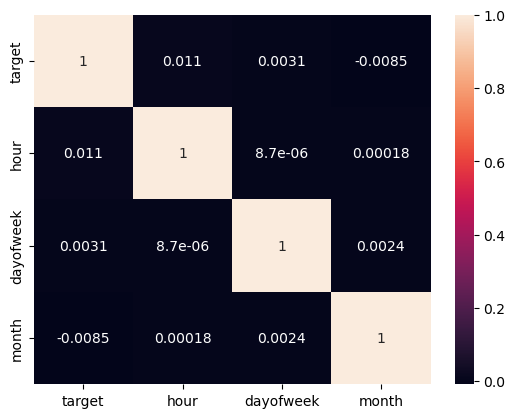

In [8]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True)
